In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("max_columns",110)

In [3]:
train = pd.read_csv("./train/train.csv",index_col="unique_id")
test = pd.read_csv("./test/test.csv",index_col="unique_id")
t = pd.read_csv("./test/test.csv")

In [4]:
y = train.targets.values
x = train.drop(["targets"],axis=1).values

In [5]:
from xgboost import XGBClassifier

In [6]:
xg = XGBClassifier()

In [7]:
#validation data
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=.20, random_state=0)
for train_index, test_index in sss.split(x, y):
    x_train,x_test,y_train,y_test = x[train_index],x[test_index],y[train_index],y[test_index]

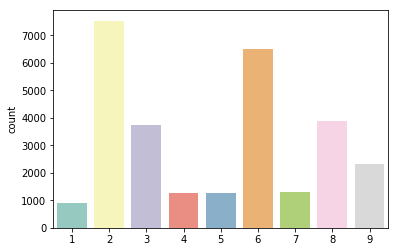

In [8]:
sns.countplot(y_train, palette='Set3')

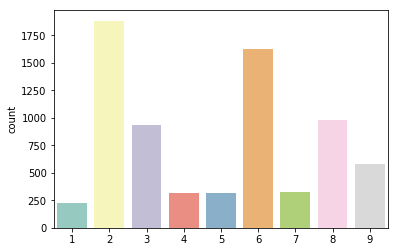

In [9]:
sns.countplot(y_test, palette='Set3')

In [10]:
xg.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
y_pred = xg.predict_proba(x_test)
print("Log-loss",log_loss(y_test,y_pred))

In [ ]:
y_pre = xg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pre))

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True, fmt="d")

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
sns.countplot(train['targets'], palette='Set3')

In [ ]:
#As per our pervious analysis we observe some unusual columns to fix those we can combine the test and train set and then do the feature engg.

In [ ]:
train.describe()

In [ ]:
test.describe()

In [11]:
train_df = train.copy()
test_df = test.copy()

In [12]:
train_df[["x_79"]] = train_df[["x_79"]]+2017
train_df["x_6"] = train_df["x_6"]+101.25
train_df["x_6"] = train_df["x_6"].astype("int64")
train_df[["x_51"]] = train_df[["x_51"]]-123456
train_df[["x_61"]] = train_df[["x_61"]]-2017

In [13]:
test_df[["x_79"]] = test_df[["x_79"]]+2017
test_df["x_6"] = test_df["x_6"]+101.25
test_df["x_6"] = test_df["x_6"].astype("int64")
test_df[["x_51"]] = test_df[["x_51"]]-123456
test_df[["x_61"]] = test_df[["x_61"]]-2017

In [14]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,22026.465795,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,1.0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,0,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,22026.465795,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,0,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,22026.465795,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,0,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,22026.465795,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,1.0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,0,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,22026.465795,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


In [15]:
test_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,3,0,0,0.892795,0,0.446194,5,0,1,0.987638,0,0,0,-0.882131,0,0,3,1,0,0,0,0,3,22026.465795,3,0,1,0,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,2,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,-1.413349,0,90.000000,3,2.215353,8,0.719869
1,1,0,2,0,0,0,0,0,1,4,2.775111,0,5.614209,6,0,9,-0.016297,0,1,0,-1.785235,14,0,4,4,0,0,0,4,0,22026.465795,2,2,2,0,0,0,1,0,0,0,4,0,5,0,0,0,4,0,1,0,0,38,10,5,0,1,0,1,0,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,3,1,0,0,1.000000,0,1,0,5.202979,1,0.000000,0,1.478269,4,0.167478
2,0,0,0,0,0,0,0,1,0,5,2.776660,0,2.464857,0,0,0,0.995829,0,0,0,1.267870,0,0,0,0,0,0,0,0,0,22026.465795,0,0,0,0,0,2,2,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1.000000,2,0,0,-0.516663,0,10.000000,2,3.915072,6,3.244433
3,1,2,1,1,0,0,6,1,1,6,8.715531,0,12.814009,3,0,0,2.994255,0,0,5,-1.771819,0,2,36,1,1,1,1,0,1,22026.465795,5,0,3,2,1,2,3,0,0,1,0,1,1,0,0,0,12,1,3,0,0,0,2,0,0,1,18,0,1,0,0,0,1,0,1,9,0,1,4,0,0,2,0,1,1,1,6,0,0,0,0,4,0,2,1,1,0,1,2.718282,2,0,0,-5.457139,0,8.181818,2,0.863767,7,1.221847
4,0,2,0,0,0,0,0,0,0,7,7.031443,0,-1.707534,1,1,1,0.985856,3,0,2,-0.512562,1,0,13,0,0,0,0,4,1,22026.465795,1,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,2,2,0,2,8,1,1,0,2,0,0,1,2,7,0,1,0,1,0,0,0,3,0,0,1,2,0,0,0,1,0,0,2,1,0,0,1096.633158,0,0,1,-3.922086,1,3.333333,2,4.989312,9,2.080833


In [16]:
train_df.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
count,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,3.595000e+04,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,3.595000e+04,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,3.595000e+04,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000
mean,0.388428,0.264117,0.902476,0.760862,0.068234,0.025341,0.198081,0.656273,1.030626,0.266453,5.792998e+06,0.141641,0.973547,1.703282,1.299305,1.413380,0.361068,0.564451,0.521196,0.469847,0.210492,0.727761,0.140223,2.634520,1.537357,0.552490,0.696106,0.240556,0.267010,0.142114,2.574070e+25,1.042337,0.695216,0.946954,0.658053,0.707371,0.261001,0.579805,0.469318,1.654492,0.304367,0.695271,0.439388,0.554548,0.236356,0.640223,0.259583,1.588428,0.339666,0.326259,0.051905,0.215104,0.448623,2.071794,0.324840,0.292295,0.307204,0.687650,0.395661,1.005118,0.237914,1.177691,0.172712,1.263700,0.216412,0.573324,2.913268,0.396551,0.802559,0.886259,0.321669,0.858526,0.578387,0.602754,0.714548,0.754798,0.118999,0.368401,0.298359,0.692740,0.076495,0.186954,0.495021,0.067705,0.525480,1.120556,0.391933,0.864784,0.454771,7.990680e+51,0.264312,0.380167,0.126871,0.991290,0.507038,18.892054,2.008901,2.493466,5.990737,1.622118,4.834131
std,1.578299,1.221808,2.984517,2.662229,0.403661,0.219112,1.052576,2.255469,3.537739,1.105629,4.341497e+08,0.548130,2.804262,3.176855,3.903034,2.220055,1.447278,1.313225,4.431073,1.443251,1.225719,1.432201,0.755006,4.440829,2.326821,1.676884,2.862919,0.842778,1.834193,1.502073,4.880562e+27,2.408015,1.303885,3.373798,3.116474,2.582008,0.749234,1.610373,3.174287,3.277657,1.097282,1.967684,1.671675,1.330213,2.569811,2.339169,1.515757,2.583660,1.355781,1.795989,0.532280,1.050819,2.049844,4.104642,0.999019,1.800338,1.088368,3.983713,2.594821,2.991792,0.990625,2.615306,0.985734,3.397363,0.716948,1.391612,4.965775,1.813809,4.099280,1.917503,1.159679,2.413040,5.691731,4.063811,3.147812,2.961995,0.871551,2.820208,1.280228,2.217398,0.434590,0.840279,2.355499,1.118320,1.864474,2.661865,1.554088,2.087649,1.513631,1.515072e+54,2.022534,0.985884,1.190128,3.139378,1.543618,39.184909,1.418585,1.438149,1.543764,2.056319,2.515290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.764282e-01,0.000000,-7.329577,0.000000,0.000000,0.000000,-0.037271,0.000000,0.000000,0.000000,-4.087893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.202647e+04,0.000000,0.000000,0.000000,0.0000

In [17]:
test_df.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
count,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7.364000e+03,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7.364000e+03,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.00000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7.364000e+03,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000
mean,0.371130,0.243346,0.869229,0.809343,0.074823,0.025122,0.183188,0.696225,1.045627,0.261271,5.711593e+06,0.141635,0.918788,1.682102,1.283949,1.422596,0.371806,0.590440,0.563688,0.473927,0.204754,0.732618,0.140005,2.637697,1.541418,0.559071,0.688620,0.236556,0.299294,0.154943,2.489016e+10,1.066133,0.716730,0.948126,0.686991,0.729902,0.266024,0.571700,0.504889,1.675584,0.310565,0.710348,0.447719,0.569120,0.255432,0.628734,0.234383,1.577947,0.364068,0.320206,0.056627,0.200435,0.416757,2.038566,0.315997,0.293862,0.318577,0.725285,0.372759,1.037751,0.248370,1.242395,0.176670,1.278789,0.235877,0.561787,2.963064,0.386882,0.773764,0.886203,0.322243,0.861353,0.564910,0.500407,0.76195,0.716730,0.147338,0.335144,0.313688,0.676127,0.077404,0.200570,0.550788,0.082428,0.541418,1.158338,0.397203,0.861217,0.465915,1.942162e+51,0.284492,0.381043,0.118007,1.022866,0.499049,19.324063,1.989815,2.498103,5.994432,1.654464
std,1.287784,1.237181,2.837705,3.169192,0.525045,0.197895,0.877680,2.419348,3.481596,1.083209,3.117903e+08,0.511882,2.716555,3.156621,3.808096,2.262751,1.445779,1.389058,4.804209,1.444148,1.219683,1.454667,0.712193,4.597671,2.363778,1.701606,2.823405,0.818096,2.241145,1.577041,1.313828e+12,2.337734,1.311112,3.379243,3.441396,2.532681,0.774777,1.624842,3.375436,3.388069,1.189657,2.067684,1.691984,1.354657,2.691997,2.285270,1.360542,2.548145,1.444098,1.726315,0.532189,0.845224,1.850958,4.032549,0.879673,2.077543,1.095880,4.202133,2.378596,3.023641,1.104282,2.906771,1.005428,3.415113,0.997299,1.280496,5.121211,1.740958,3.953641,1.966811,1.160390,2.397921,4.411103,2.798085,3.14716,2.725354,1.128997,2.541864,1.363629,2.155901,0.418550,0.865438,2.902509,1.348384,2.056659,2.671457,1.547175,2.161677,1.527619,1.666642e+53,2.198952,0.954115,0.922978,3.140919,1.324812,40.695344,1.410475,1.453911,1.537029,2.178077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000167e-01,0.000000,-7.920613,0.000000,0.000000,0.000000,-0.034651,0.000000,0.000000,0.000000,-3.320782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.202647e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [18]:
t1 = train_df.loc[train_df['x_1']>31]

In [19]:
t1.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3315,32,0,2,1,0,0,15,1,0,3,1.090621,0,0.529045,0,0,4,1.004278,0,0,2,0.442306,3,2,10,5,0,0,0,0,0,22026.465795,4,0,1,0,8,1,0,1,1,0,0,0,1,0,0,3,4,1,0,0,0,4,2,4,0,0,1,0,0,0,1,0,3,3,1,14,0,0,10,0,2,1,10,0,18,0,47,1,1,0,0,3,1,0,3,0,2,1,1.000000,5,0,0,2.847800,0,12.727273,2,0.276501,7,0.547705,8
4808,43,0,1,0,1,1,15,1,0,1,2.667966,1,3.869079,2,1,1,2.028877,2,2,2,0.007043,4,2,18,4,2,0,0,5,1,22026.465795,9,1,0,1,4,2,3,0,2,0,1,0,5,0,0,1,3,1,1,0,0,8,5,6,0,0,1,1,0,0,0,0,1,2,1,12,0,1,7,0,0,2,9,2,15,0,37,3,0,0,0,5,2,0,2,0,0,0,1.000000,2,0,0,2.889303,0,10.909091,7,4.282216,6,2.613463,8
5198,56,2,0,0,0,0,16,1,0,1,23.587877,0,14.482726,4,0,5,0.008014,3,0,2,0.593521,7,0,14,0,0,0,0,2,2,22026.465795,11,0,0,1,6,2,5,0,2,0,0,0,7,0,0,1,3,0,0,0,0,6,13,9,0,0,1,0,1,0,0,0,1,3,4,9,0,0,9,1,1,1,9,2,16,0,35,1,0,2,0,6,3,0,0,2,0,1,1.000000,2,0,0,3.460859,0,2.195122,1,3.595003,5,0.537381,8
6118,42,0,0,0,0,1,10,0,0,0,20.271508,0,1.822944,0,0,0,0.003773,3,1,2,1.150491,0,1,8,3,0,0,0,0,0,22026.465795,8,0,0,0,2,0,0,0,3,0,0,1,0,0,0,1,4,0,2,0,0,8,3,4,0,0,1,1,0,0,1,0,1,2,0,10,0,0,4,0,0,0,10,2,19,0,35,2,0,0,0,3,2,0,0,0,0,0,7.389056,1,0,0,1.676986,0,100.000000,4,4.937265,7,1.946584,8
10086,37,0,0,1,0,0,21,1,0,5,51.882019,0,8.702252,1,0,1,-0.014373,1,0,3,-0.591339,6,2,7,2,0,0,1,1,0,22026.465795,9,1,0,0,3,1,3,0,1,0,0,0,2,0,0,1,6,0,0,0,0,8,5,6,0,1,0,0,0,0,2,0,1,0,0,18,0,0,4,1,2,3,12,0,16,0,39,0,2,0,0,0,1,0,2,0,0,1,1.000000,2,0,0,-0.941917,0,180.000000,3,0.540350,6,2.169467,8


In [20]:
t2 = train_df.loc[train_df['x_74']>125]

In [21]:
t2.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7965,0,0,1,3,0,0,0,0,2,0,2.286421e+04,1,2.565974,0,0,1,0.011793,0,0,0,-3.090361,0,3,0,0,2,2,0,0,0,9.744803e+09,1,0,1,4,1,1,0,1,0,0,2,4,0,1,1,1,0,0,0,1,20,0,2,0,6,0,1,0,0,1,0,0,0,1,0,2,0,0,0,0,0,0,161,0,1,0,0,1,5,0,0,0,0,0,1,0,1,1,20.085537,0,0,0,1.798458,0,20.0,2,3.774455,7,0.242425,6
8695,6,0,1,0,0,0,0,0,17,0,1.127991e+09,1,-0.343832,1,1,1,0.009701,0,0,0,-0.613806,2,7,109,1,0,2,0,0,0,5.987414e+04,29,0,2,0,0,2,1,4,3,0,0,2,0,9,3,1,18,0,0,1,20,0,2,0,1,0,2,0,3,7,0,0,0,0,0,40,3,0,0,1,0,3,231,0,4,1,0,1,2,0,0,0,0,18,1,0,0,0,20.085537,1,0,1,1.593854,1,400.0,5,1.248119,6,3.126752,6
12172,0,4,0,0,0,0,0,0,0,0,9.552929e+06,3,-0.068707,1,1,0,0.012063,0,0,0,3.096126,0,4,4,0,0,2,0,0,0,5.987414e+04,1,0,0,4,0,8,0,1,1,0,0,1,0,0,0,0,0,0,0,0,16,0,2,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,145,0,1,0,0,1,9,0,0,0,0,0,0,0,0,0,403.428793,0,0,0,-5.819924,0,0.0,0,2.940239,10,7.269276,6
21906,0,0,0,1,0,1,0,0,1,0,8.381219e+02,3,3.550411,0,3,0,-0.006931,0,0,0,4.723576,0,3,0,0,6,2,0,0,0,1.202604e+06,0,0,0,0,0,1,0,0,6,0,0,1,0,0,1,0,4,0,0,0,20,0,1,0,0,0,6,0,0,2,2,1,0,2,0,1,0,1,0,0,0,1,180,0,0,0,0,0,3,0,0,1,0,1,0,0,0,0,403.428793,0,0,0,1.951063,0,10.0,1,3.033245,7,1.040062,6
33883,0,0,2,1,0,0,0,0,0,0,8.026154e+00,4,3.407066,1,0,2,-0.002057,4,0,2,6.455432,4,0,39,1,1,52,0,0,0,2.415495e+07,6,0,0,9,3,0,0,0,4,0,0,2,2,0,6,0,4,0,0,0,48,0,12,0,0,1,1,0,2,2,0,1,0,0,0,13,0,2,0,0,0,0,172,2,2,0,0,0,18,0,0,0,0,0,0,0,0,0,7.389056,0,0,2,8.798693,2,130.0,3,4.692316,5,0.179868,8


In [22]:
t3 = train_df.loc[train_df['x_76']>50]
t3.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4001,1,1,0,0,0,0,0,0,1,0,7.762655,0,1.617893,0,0,0,-0.014970,0,3,1,0.760281,0,1,34,0,0,0,0,0,0,22026.465795,8,0,0,0,3,0,0,0,0,0,0,1,0,1,0,1,3,0,0,0,0,0,2,0,0,0,20,0,2,0,0,0,0,1,0,25,0,13,0,0,0,4,1,0,65,0,2,0,0,0,0,2,0,0,1,0,0,2,1.484132e+02,0,0,2,6.797831,2,250.000000,1,3.216358,5,3.762319,8
10053,0,1,2,1,0,0,1,0,0,0,295.301703,0,0.090192,0,0,4,1.015080,1,3,0,-0.507076,2,0,29,0,0,0,0,0,0,22026.465795,7,0,0,1,2,1,4,1,1,1,0,0,3,0,0,1,2,0,0,0,0,1,8,0,0,0,2,0,1,0,0,0,1,1,1,20,0,7,3,0,0,3,4,1,59,0,2,0,0,0,0,0,0,0,0,3,0,1,5.459815e+01,0,0,1,5.796931,1,18.181818,1,2.720694,2,2.184970,8
11927,0,0,1,0,0,0,3,0,0,2,455.189602,0,11.002493,0,0,1,0.001475,0,1,1,0.122697,0,2,35,0,0,0,0,0,0,22026.465795,5,0,0,0,2,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,26,0,2,0,1,0,2,2,2,54,1,5,0,0,0,0,2,0,0,1,0,0,0,1.000000e+00,2,1,0,1.023880,1,260.000000,1,4.891910,6,0.345891,8
19026,1,2,0,0,0,0,1,0,0,0,1196.253637,0,13.057059,1,0,0,1.010683,1,0,6,-0.783082,0,4,28,0,0,0,0,0,0,22026.465795,1,0,0,2,0,1,7,1,2,0,0,0,0,1,0,0,4,0,1,0,1,0,1,0,0,0,58,0,0,1,0,0,2,0,0,17,0,26,0,0,0,0,1,1,57,0,0,0,0,0,0,3,0,1,2,0,0,0,7.200490e+10,0,0,0,3.090417,0,170.000000,3,0.370249,8,0.774241,8
20221,0,1,2,1,0,0,2,1,4,0,0.801948,3,9.252030,0,0,3,6.001310,0,2,1,-1.133808,3,0,29,0,1,0,0,0,0,22026.465795,12,0,0,2,7,5,14,2,0,2,0,0,0,0,0,0,4,3,0,0,0,0,3,0,0,0,10,0,4,0,1,0,2,0,0,37,0,3,2,0,1,0,0,0,55,0,0,2,1,0,1,1,0,0,0,0,0,1,2.008554e+01,0,0,0,4.422044,0,370.000000,2,2.464425,5,1.704155,8


Observing the variables we can say that targets are same as the number is greator than the test account

Can match for value count also

In [23]:
train_df.x_1.value_counts()

0     29924
1      3417
2      1070
3       560
4       323
5       266
6       113
7       105
8        44
9        32
22       17
11       16
10        9
13        5
15        4
14        3
12        3
48        3
28        3
19        3
47        2
16        2
27        2
26        2
25        2
24        2
39        2
21        2
17        2
43        2
23        1
40        1
56        1
37        1
42        1
34        1
30        1
29        1
32        1
31        1
Name: x_1, dtype: int64

In [24]:
t4 = train_df.loc[train_df['x_1']>25]

In [25]:
t4.targets

unique_id
3315     8
4506     8
4672     4
4808     8
5198     8
5719     4
6118     8
10086    8
10457    8
12031    8
15113    4
15440    8
17334    4
22495    8
24168    8
25010    8
25106    8
25944    8
26401    8
27370    8
29816    4
30460    4
30766    8
31752    8
32480    8
Name: targets, dtype: int64

In [26]:
train_df.duplicated().sum()

0

In [27]:
#no duplicated rows in the dataframe

In [28]:
test_df.duplicated().sum()

0

In [29]:
train_df.x_31.value_counts()

2.202647e+04    33332
5.987414e+04     1670
1.627548e+05      480
4.424134e+05      214
1.202604e+06       94
3.269017e+06       36
6.565997e+07       24
8.886111e+06       22
4.851652e+08       13
3.584913e+09       13
2.415495e+07       12
1.957296e+11        6
1.784823e+08        5
9.744803e+09        4
2.648912e+10        4
1.318816e+09        4
1.068647e+13        4
1.446257e+12        3
7.200490e+10        2
1.171914e+16        2
5.834617e+14        1
9.253782e+29        1
5.184706e+21        1
4.311232e+15        1
5.320482e+11        1
2.353853e+17        1
Name: x_31, dtype: int64

In [30]:
test_df.x_31.value_counts()

2.202647e+04    6817
5.987414e+04     364
1.627548e+05     100
4.424134e+05      27
1.202604e+06      19
8.886111e+06       9
3.269017e+06       5
2.415495e+07       4
4.851652e+08       4
1.784823e+08       3
6.565997e+07       3
7.896296e+13       2
1.068647e+13       2
2.648912e+10       2
3.584913e+09       1
1.318816e+09       1
3.931334e+12       1
Name: x_31, dtype: int64

In [31]:
v = train_df.x_31

In [32]:
v = np.log(v)

In [33]:
v.value_counts()

10.0    33332
11.0     1670
12.0      480
13.0      214
14.0       94
15.0       36
18.0       24
16.0       22
20.0       13
22.0       13
17.0       12
26.0        6
19.0        5
24.0        4
30.0        4
21.0        4
23.0        4
28.0        3
37.0        2
25.0        2
50.0        1
27.0        1
40.0        1
34.0        1
69.0        1
36.0        1
Name: x_31, dtype: int64

In [34]:
#we can see tht taking log of that columns can reduce it to some kind of value
train_df['x_31'] = np.log(train_df['x_31'])
test_df['x_31'] = np.log(test_df['x_31'])
train_df['x_31'] = train_df['x_31'].astype("int64")
test_df["x_31"] = test_df["x_31"].astype("int64")

In [35]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,1.0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,0,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,0,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,0,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,1.0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,0,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


In [36]:
#similarly for the train x90 we can observe

In [37]:
m = train_df.x_90

In [38]:
m = np.log(m)
m.value_counts()

0.0      31135
1.0       2133
2.0        769
3.0        346
4.0        265
6.0        171
5.0        156
7.0        102
8.0         78
10.0        71
9.0         54
11.0        44
13.0        41
16.0        35
15.0        35
14.0        32
12.0        31
17.0        30
19.0        24
22.0        22
20.0        22
18.0        22
25.0        21
21.0        19
23.0        18
26.0        16
36.0        12
46.0        12
24.0        11
43.0        11
         ...  
32.0         4
62.0         4
57.0         4
67.0         3
51.0         3
60.0         3
75.0         3
73.0         3
79.0         2
80.0         2
55.0         2
50.0         2
90.0         2
63.0         2
59.0         2
106.0        1
99.0         1
70.0         1
100.0        1
71.0         1
130.0        1
78.0         1
92.0         1
98.0         1
109.0        1
56.0         1
69.0         1
72.0         1
77.0         1
58.0         1
Name: x_90, Length: 83, dtype: int64

In [39]:
train_df['x_90'] = np.log(train_df['x_90'])
test_df['x_90'] = np.log(test_df['x_90'])
train_df['x_90'] = train_df['x_90'].astype("int64")
test_df["x_90"] = test_df["x_90"].astype("int64")

In [40]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,0,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,0,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,0,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,0,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


"The number of features to be handled are x_94,x_98,x_100,x_11,x_13,x_17.x_21"

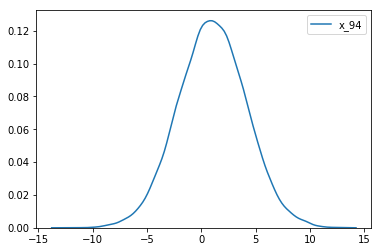

In [41]:
sns.kdeplot(train_df.x_94)

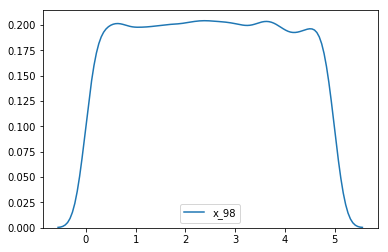

In [42]:
sns.kdeplot(train_df.x_98)

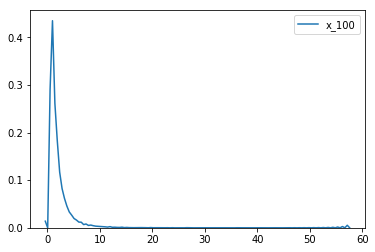

In [43]:
sns.kdeplot(train_df.x_100)

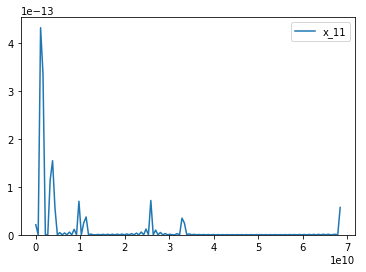

In [44]:
sns.kdeplot(train_df.x_11)

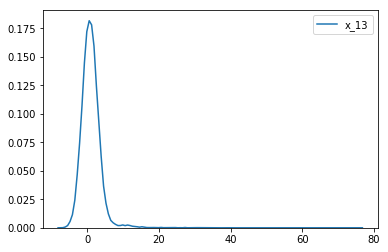

In [45]:
sns.kdeplot(train_df.x_13)

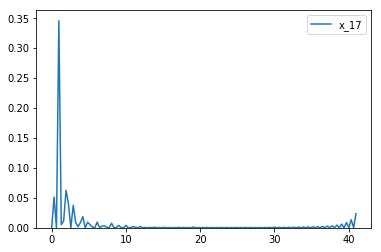

In [46]:
sns.kdeplot(train_df.x_17)

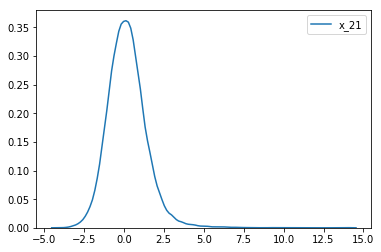

In [47]:
sns.kdeplot(train_df.x_21)

In [48]:
#improvments till now

In [49]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,0,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,0,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,0,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,0,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


In [50]:
test_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,3,0,0,0.892795,0,0.446194,5,0,1,0.987638,0,0,0,-0.882131,0,0,3,1,0,0,0,0,3,10,3,0,1,0,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,2,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.413349,0,90.000000,3,2.215353,8,0.719869
1,1,0,2,0,0,0,0,0,1,4,2.775111,0,5.614209,6,0,9,-0.016297,0,1,0,-1.785235,14,0,4,4,0,0,0,4,0,10,2,2,2,0,0,0,1,0,0,0,4,0,5,0,0,0,4,0,1,0,0,38,10,5,0,1,0,1,0,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,3,1,0,0,0,0,1,0,5.202979,1,0.000000,0,1.478269,4,0.167478
2,0,0,0,0,0,0,0,1,0,5,2.776660,0,2.464857,0,0,0,0.995829,0,0,0,1.267870,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,2,2,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,-0.516663,0,10.000000,2,3.915072,6,3.244433
3,1,2,1,1,0,0,6,1,1,6,8.715531,0,12.814009,3,0,0,2.994255,0,0,5,-1.771819,0,2,36,1,1,1,1,0,1,10,5,0,3,2,1,2,3,0,0,1,0,1,1,0,0,0,12,1,3,0,0,0,2,0,0,1,18,0,1,0,0,0,1,0,1,9,0,1,4,0,0,2,0,1,1,1,6,0,0,0,0,4,0,2,1,1,0,1,1,2,0,0,-5.457139,0,8.181818,2,0.863767,7,1.221847
4,0,2,0,0,0,0,0,0,0,7,7.031443,0,-1.707534,1,1,1,0.985856,3,0,2,-0.512562,1,0,13,0,0,0,0,4,1,10,1,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,2,2,0,2,8,1,1,0,2,0,0,1,2,7,0,1,0,1,0,0,0,3,0,0,1,2,0,0,0,1,0,0,2,1,0,0,7,0,0,1,-3.922086,1,3.333333,2,4.989312,9,2.080833


In [51]:
train_df.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
count,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,3.595000e+04,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000,35950.000000
mean,0.388428,0.264117,0.902476,0.760862,0.068234,0.025341,0.198081,0.656273,1.030626,0.266453,5.792998e+06,0.141641,0.973547,1.703282,1.299305,1.413380,0.361068,0.564451,0.521196,0.469847,0.210492,0.727761,0.140223,2.634520,1.537357,0.552490,0.696106,0.240556,0.267010,0.142114,10.139388,1.042337,0.695216,0.946954,0.658053,0.707371,0.261001,0.579805,0.469318,1.654492,0.304367,0.695271,0.439388,0.554548,0.236356,0.640223,0.259583,1.588428,0.339666,0.326259,0.051905,0.215104,0.448623,2.071794,0.324840,0.292295,0.307204,0.687650,0.395661,1.005118,0.237914,1.177691,0.172712,1.263700,0.216412,0.573324,2.913268,0.396551,0.802559,0.886259,0.321669,0.858526,0.578387,0.602754,0.714548,0.754798,0.118999,0.368401,0.298359,0.692740,0.076495,0.186954,0.495021,0.067705,0.525480,1.120556,0.391933,0.864784,0.454771,0.790598,0.264312,0.380167,0.126871,0.991290,0.507038,18.892054,2.008901,2.493466,5.990737,1.622118,4.834131
std,1.578299,1.221808,2.984517,2.662229,0.403661,0.219112,1.052576,2.255469,3.537739,1.105629,4.341497e+08,0.548130,2.804262,3.176855,3.903034,2.220055,1.447278,1.313225,4.431073,1.443251,1.225719,1.432201,0.755006,4.440829,2.326821,1.676884,2.862919,0.842778,1.834193,1.502073,0.883212,2.408015,1.303885,3.373798,3.116474,2.582008,0.749234,1.610373,3.174287,3.277657,1.097282,1.967684,1.671675,1.330213,2.569811,2.339169,1.515757,2.583660,1.355781,1.795989,0.532280,1.050819,2.049844,4.104642,0.999019,1.800338,1.088368,3.983713,2.594821,2.991792,0.990625,2.615306,0.985734,3.397363,0.716948,1.391612,4.965775,1.813809,4.099280,1.917503,1.159679,2.413040,5.691731,4.063811,3.147812,2.961995,0.871551,2.820208,1.280228,2.217398,0.434590,0.840279,2.355499,1.118320,1.864474,2.661865,1.554088,2.087649,1.513631,4.555070,2.022534,0.985884,1.190128,3.139378,1.543618,39.184909,1.418585,1.438149,1.543764,2.056319,2.515290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.764282e-01,0.000000,-7.329577,0.000000,0.000000,0.000000,-0.037271,0.000000,0.000000,0.000000,-4.087893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [52]:
test_df.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
count,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7.364000e+03,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.00000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000
mean,0.371130,0.243346,0.869229,0.809343,0.074823,0.025122,0.183188,0.696225,1.045627,0.261271,5.711593e+06,0.141635,0.918788,1.682102,1.283949,1.422596,0.371806,0.590440,0.563688,0.473927,0.204754,0.732618,0.140005,2.637697,1.541418,0.559071,0.688620,0.236556,0.299294,0.154943,10.141907,1.066133,0.716730,0.948126,0.686991,0.729902,0.266024,0.571700,0.504889,1.675584,0.310565,0.710348,0.447719,0.569120,0.255432,0.628734,0.234383,1.577947,0.364068,0.320206,0.056627,0.200435,0.416757,2.038566,0.315997,0.293862,0.318577,0.725285,0.372759,1.037751,0.248370,1.242395,0.176670,1.278789,0.235877,0.561787,2.963064,0.386882,0.773764,0.886203,0.322243,0.861353,0.564910,0.500407,0.76195,0.716730,0.147338,0.335144,0.313688,0.676127,0.077404,0.200570,0.550788,0.082428,0.541418,1.158338,0.397203,0.861217,0.465915,0.761543,0.284492,0.381043,0.118007,1.022866,0.499049,19.324063,1.989815,2.498103,5.994432,1.654464
std,1.287784,1.237181,2.837705,3.169192,0.525045,0.197895,0.877680,2.419348,3.481596,1.083209,3.117903e+08,0.511882,2.716555,3.156621,3.808096,2.262751,1.445779,1.389058,4.804209,1.444148,1.219683,1.454667,0.712193,4.597671,2.363778,1.701606,2.823405,0.818096,2.241145,1.577041,0.846232,2.337734,1.311112,3.379243,3.441396,2.532681,0.774777,1.624842,3.375436,3.388069,1.189657,2.067684,1.691984,1.354657,2.691997,2.285270,1.360542,2.548145,1.444098,1.726315,0.532189,0.845224,1.850958,4.032549,0.879673,2.077543,1.095880,4.202133,2.378596,3.023641,1.104282,2.906771,1.005428,3.415113,0.997299,1.280496,5.121211,1.740958,3.953641,1.966811,1.160390,2.397921,4.411103,2.798085,3.14716,2.725354,1.128997,2.541864,1.363629,2.155901,0.418550,0.865438,2.902509,1.348384,2.056659,2.671457,1.547175,2.161677,1.527619,4.383077,2.198952,0.954115,0.922978,3.140919,1.324812,40.695344,1.410475,1.453911,1.537029,2.178077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000167e-01,0.000000,-7.920613,0.000000,0.000000,0.000000,-0.034651,0.000000,0.000000,0.000000,-3.320782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [53]:
vtr = train_df.nunique()
vts = test_df.nunique()

In [54]:
#test set and train set have no columns have same number of unique values

In [55]:
t0 = train_df.loc[train_df['targets'] == 1]
t1 = train_df.loc[train_df['targets'] == 2]
t2 = train_df.loc[train_df['targets'] == 3]
t3 = train_df.loc[train_df['targets'] == 4]
t4 = train_df.loc[train_df['targets'] == 5]
t5 = train_df.loc[train_df['targets'] == 6]
t6 = train_df.loc[train_df['targets'] == 7]
t7 = train_df.loc[train_df['targets'] == 8]
t8 = train_df.loc[train_df['targets'] == 9]

In [56]:
train_df.nunique()

x_1           40
x_2           30
x_3           45
x_4           50
x_5           14
x_6            9
x_7           27
x_8           51
x_9           40
x_10          26
x_11       35950
x_12          16
x_13       35950
x_14          31
x_15          36
x_16          25
x_17       35950
x_18          25
x_19          90
x_20          25
x_21       35950
x_22          19
x_23          21
x_24          57
x_25          26
x_26          29
x_27          50
x_28          18
x_29          44
x_30          38
           ...  
x_72          31
x_73          90
x_74          86
x_75          64
x_76          59
x_77          20
x_78          65
x_79          22
x_80          36
x_81          15
x_82          22
x_83          49
x_84          31
x_85          39
x_86          47
x_87          38
x_88          30
x_89          33
x_90          80
x_91          44
x_92          18
x_93          38
x_94       35950
x_95          39
x_96         370
x_97          11
x_98       35950
x_99          

In [57]:
train_df.x_94.head()

unique_id
0    2.374118
1    1.905289
2   -1.861978
3    5.944138
4    0.534246
Name: x_94, dtype: float64

In [58]:
train_df.x_94.mean()

0.9912897320721411

In [59]:
train_df.x_94.std()

3.139377599771244

In [60]:
v = train_df.x_94

In [61]:
v = np.ceil(v)

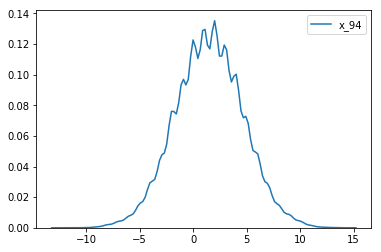

In [62]:
sns.kdeplot(v)

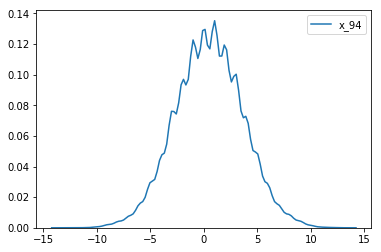

In [63]:
v = train_df.x_94
v = np.floor(v)
sns.kdeplot(v)

In [64]:
nn = train_df.x_94

In [65]:
nn = nn.astype("int64")

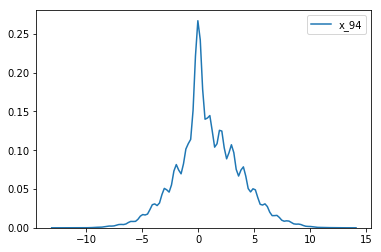

In [66]:
sns.kdeplot(nn)

In [67]:
nn.value_counts()

 0     8567
 1     4452
 2     4121
 3     3341
-1     3315
-2     2543
 4     2452
 5     1622
-3     1580
-4      989
 6      955
-5      525
 7      493
 8      287
-6      253
 9      148
-7      139
-8       69
 10      51
-9       20
 11      14
 12       7
-10       3
-11       2
 13       1
-12       1
Name: x_94, dtype: int64

In [68]:
nn = pd.concat([train_df.x_94,test_df.x_94],axis=0)

In [69]:
m = nn.mean()

In [70]:
s=nn.std()

In [71]:
def removeNoice(a):
    if(a>=0):
        a = a*s+m
    else:
        a = a*(-s)+m
    return a

In [72]:
nn = nn.apply(removeNoice)

In [73]:
nn.value_counts()

13.273465    1
18.328583    1
27.571854    1
14.146851    1
5.227366     1
7.220383     1
4.656248     1
2.157953     1
1.045648     1
3.444705     1
18.001074    1
6.190018     1
13.196670    1
20.250887    1
5.713739     1
7.171695     1
1.076055     1
2.959306     1
13.099953    1
10.791173    1
11.805481    1
1.416704     1
15.923404    1
10.079170    1
21.595990    1
11.390788    1
4.231278     1
6.838670     1
3.655207     1
7.341591     1
            ..
5.644933     1
8.944455     1
4.783688     1
5.845835     1
21.025860    1
18.962854    1
4.425410     1
1.881478     1
5.283815     1
2.770814     1
22.044256    1
5.987363     1
1.195912     1
18.613057    1
3.584720     1
7.343652     1
13.270533    1
10.256491    1
2.043992     1
6.975978     1
14.415075    1
11.191870    1
1.325335     1
4.607373     1
4.845508     1
13.931657    1
10.893796    1
6.031245     1
13.235938    1
7.981820     1
Name: x_94, Length: 43314, dtype: int64

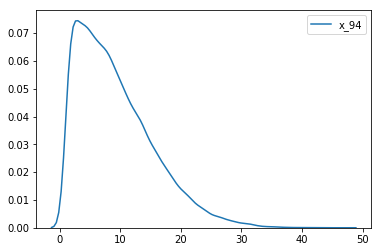

In [74]:
sns.kdeplot(nn)

In [75]:
nn = np.ceil(nn)

In [76]:
nn.value_counts()

2.0     3461
3.0     3264
5.0     3197
4.0     3117
6.0     2970
7.0     2893
8.0     2815
9.0     2595
10.0    2420
11.0    2189
12.0    1943
13.0    1806
14.0    1679
15.0    1397
16.0    1240
17.0    1072
18.0     945
19.0     797
20.0     651
21.0     546
22.0     482
23.0     358
24.0     307
25.0     246
26.0     178
27.0     175
28.0     126
29.0     106
31.0      75
30.0      75
32.0      58
33.0      30
34.0      23
35.0      18
1.0       16
36.0      13
37.0      10
38.0       7
40.0       4
39.0       3
41.0       3
42.0       2
47.0       1
46.0       1
Name: x_94, dtype: int64

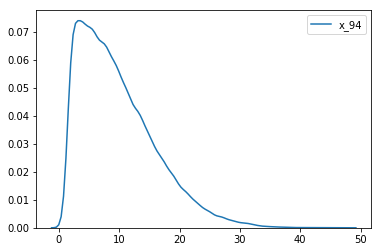

In [77]:
sns.kdeplot(nn)

In [78]:
bb = train_df.x_98

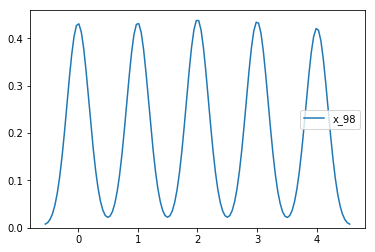

In [79]:
bb = np.floor(bb)
sns.kdeplot(bb)

In [80]:
bb.value_counts()

2.0    7321
3.0    7245
1.0    7200
0.0    7175
4.0    7009
Name: x_98, dtype: int64

In [81]:
#after all the observations deciding on the floor operation

In [82]:
#x_94,x_98,x_100,x_11,x_13,x_17.x_21

In [83]:
train_df.x_94 = train_df.x_94.apply(np.floor).astype("int64")
train_df.x_98 = train_df.x_98.apply(np.floor).astype("int64")
train_df.x_100 = train_df.x_100.apply(np.floor).astype("int64")
train_df.x_11 = train_df.x_11.apply(np.floor).astype("int64")
train_df.x_13 = train_df.x_13.apply(np.floor).astype("int64")
train_df.x_17 = train_df.x_17.apply(np.floor).astype("int64")
train_df.x_21 = train_df.x_21.apply(np.floor).astype("int64")

In [84]:
test_df.x_94 = test_df.x_94.apply(np.floor).astype("int64")
test_df.x_98 = test_df.x_98.apply(np.floor).astype("int64")
test_df.x_100 = test_df.x_100.apply(np.floor).astype("int64")
test_df.x_11 = test_df.x_11.apply(np.floor).astype("int64")
test_df.x_13 = test_df.x_13.apply(np.floor).astype("int64")
test_df.x_17 = test_df.x_17.apply(np.floor).astype("int64")
test_df.x_21 = test_df.x_21.apply(np.floor).astype("int64")

In [85]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,1,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2,0,0.0,0,3,6,1,4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,3,0,5,1,5
2,0,0,0,0,0,0,0,0,0,0,1,0,-3,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,-2,3,0.0,1,1,10,0,9
3,0,0,0,0,0,0,0,0,0,1,0,0,2,13,1,1,-1,0,1,0,0,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5,1,10.0,4,3,7,0,2
4,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,-1,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,0,0,8,1,2


In [86]:
#x_94,x_98,x_100,x_11,x_13,x_17.x_21

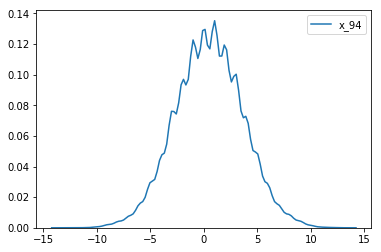

In [87]:
sns.kdeplot(train_df['x_94'])

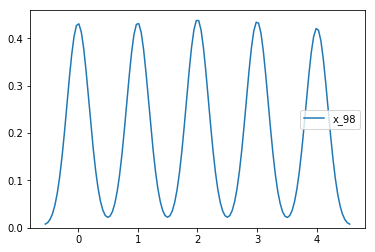

In [88]:
sns.kdeplot(train_df['x_98'])

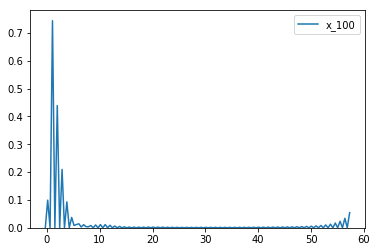

In [89]:
sns.kdeplot(train_df['x_100'])

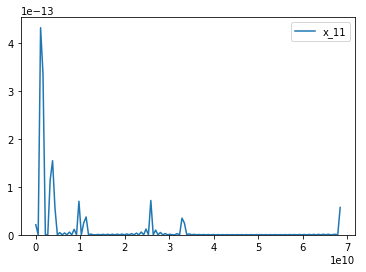

In [90]:
sns.kdeplot(train_df['x_11'])

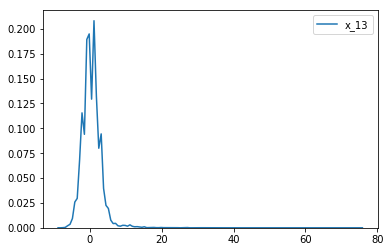

In [91]:
sns.kdeplot(train_df['x_13'])

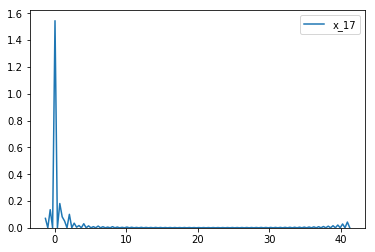

In [92]:
sns.kdeplot(train_df['x_17'])

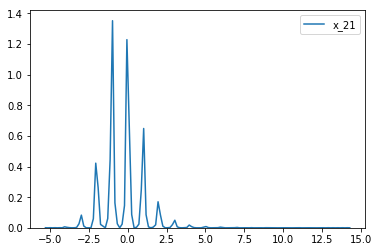

In [93]:
sns.kdeplot(train_df['x_21'])

In [94]:
t0 = train_df.loc[train_df['targets'] == 1]
t1 = train_df.loc[train_df['targets'] == 2]
t2 = train_df.loc[train_df['targets'] == 3]
t3 = train_df.loc[train_df['targets'] == 4]
t4 = train_df.loc[train_df['targets'] == 5]
t5 = train_df.loc[train_df['targets'] == 6]
t6 = train_df.loc[train_df['targets'] == 7]
t7 = train_df.loc[train_df['targets'] == 8]
t8 = train_df.loc[train_df['targets'] == 9]

In [95]:
def negpos(a):
    if(a<0):
        a=-a
    else:
        a=a
    return a

In [96]:
train_df.x_94 = train_df.x_94.apply(negpos)
train_df.x_98 = train_df.x_98.apply(negpos)
train_df.x_100 = train_df.x_100.apply(negpos)
train_df.x_11 = train_df.x_11.apply(negpos)
train_df.x_13 = train_df.x_13.apply(negpos)
train_df.x_17 = train_df.x_17.apply(negpos)
train_df.x_21 = train_df.x_21.apply(negpos)

In [97]:
test_df.x_94 = test_df.x_94.apply(negpos)
test_df.x_98 = test_df.x_98.apply(negpos)
test_df.x_100 = test_df.x_100.apply(negpos)
test_df.x_11 = test_df.x_11.apply(negpos)
test_df.x_13 = test_df.x_13.apply(negpos)
test_df.x_17 = test_df.x_17.apply(negpos)
test_df.x_21 = test_df.x_21.apply(negpos)

In [98]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,1,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2,0,0.0,0,3,6,1,4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.0,3,0,5,1,5
2,0,0,0,0,0,0,0,0,0,0,1,0,3,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,3,0.0,1,1,10,0,9
3,0,0,0,0,0,0,0,0,0,1,0,0,2,13,1,1,1,0,1,0,0,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5,1,10.0,4,3,7,0,2
4,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,0,0,8,1,2


In [99]:
def log_problem(a):
    if(a<=1):
        return 0
    else:
        return np.log10(a) 

In [100]:
bb = train_df.x_96.apply(log_problem)

In [101]:
bb = np.ceil(bb).astype("int64")

In [102]:
test_df.x_96=test_df.x_96.apply(log_problem)
test_df.x_96=np.ceil(test_df.x_96).astype("int64")

In [103]:
bb.value_counts()

0    16003
2    10453
1     8489
3     1005
Name: x_96, dtype: int64

In [104]:
train_df.x_96 = bb

In [105]:
train_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,1,0,0,0,5,1,1,0,0,0,10,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,0,0,2,0,0,0,3,6,1,4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,0,5,1,5
2,0,0,0,0,0,0,0,0,0,0,1,0,3,3,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,10,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,2,3,0,1,1,10,0,9
3,0,0,0,0,0,0,0,0,0,1,0,0,2,13,1,1,1,0,1,0,0,1,0,0,5,0,0,0,0,0,10,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,1,0,5,1,1,4,3,7,0,2
4,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,1,2


In [106]:
t0 = train_df.loc[train_df['targets'] == 1]
t1 = train_df.loc[train_df['targets'] == 2]
t2 = train_df.loc[train_df['targets'] == 3]
t3 = train_df.loc[train_df['targets'] == 4]
t4 = train_df.loc[train_df['targets'] == 5]
t5 = train_df.loc[train_df['targets'] == 6]
t6 = train_df.loc[train_df['targets'] == 7]
t7 = train_df.loc[train_df['targets'] == 8]
t8 = train_df.loc[train_df['targets'] == 9]

In [107]:
#x_94,x_98,x_100,x_11,x_13,x_17.x_21

In [109]:
nn = pd.concat([train_df[b],test_df[b]],axis=0)
m = nn.mean()
s = nn.std()
def vvmean():
    if(nn>=0):
        nn = nn*s+m
    else:
        nn = nn*(-s)+m
    return nn

NameError: name 'b' is not defined

# Random Sampling below

In [292]:
t1 = t1.iloc[0:1200,:]
t2 = t2.iloc[0:1200,:]
t3 = t3.iloc[0:1200,:]
t4 = t4.iloc[0:1200,:]
t5 = t5.iloc[0:1200,:]
t6 = t6.iloc[0:1200,:]
t7 = t7.iloc[0:1200,:]
t8 = t8.iloc[0:1200,:]

In [293]:
final = pd.concat([t0,t1,t2,t3,t4,t5,t6,t7,t8])

In [294]:
final.shape

(10729, 101)

In [295]:
final.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59,0,1,0,0,1,0,1,0,1,1,2,0,1,0,0,0,1,0,1,6,0,0,0,9,0,0,0,0,0,0,10,2,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,1,7,0,1,0,1,1,2,1,0,18,0,3,0,2,0,0,3,0,1,1,0,0,0,0,3,0,0,2,0,1,1,1,4,2,1
63,1,0,0,0,1,1,0,0,0,0,0,0,4,0,3,1,1,1,0,0,0,1,1,25,3,1,0,0,1,77,10,53,0,0,1,1,0,5,0,0,0,0,1,1,0,0,0,1,2,0,2,0,0,0,1,0,0,0,0,1,0,2,0,0,0,2,17,0,0,3,0,0,6,6,2,4,0,0,0,0,1,0,0,35,0,2,0,0,0,0,0,1,0,2,1,1,2,4,4,0,1
64,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,2,0,0,6,0,1,0,0,0,0,10,4,0,0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5,0,2,4,4,6,1,1
101,3,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,1,1,0,1,1,0,0,3,0,0,0,0,0,0,10,1,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,2,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,1,0,2,1,3,7,0,1
128,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,6,0,1


In [296]:
y = final.targets.values
x = final.drop(["targets"],axis=1).values

In [112]:
y = train_df.targets.values
x = train_df.drop(["targets"],axis=1).values

In [111]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=.20, random_state=0)
for train_index, test_index in sss.split(x, y):
    x_train,x_test,y_train,y_test = x[train_index],x[test_index],y[train_index],y[test_index]

In [119]:
from catboost import CatBoostClassifier,Pool
eval_dataset = Pool(x_test,y_test)
model = CatBoostClassifier()
model.fit(x_train,y_train,eval_set=eval_dataset,verbose=True,early_stopping_rounds=10)
print(model.get_best_iteration())

0:	learn: -2.1158484	test: -2.1155480	best: -2.1155480 (0)	total: 443ms	remaining: 7m 22s
1:	learn: -2.0499001	test: -2.0496522	best: -2.0496522 (1)	total: 911ms	remaining: 7m 34s
2:	learn: -1.9917240	test: -1.9913041	best: -1.9913041 (2)	total: 1.37s	remaining: 7m 35s
3:	learn: -1.9423938	test: -1.9430011	best: -1.9430011 (3)	total: 1.82s	remaining: 7m 34s
4:	learn: -1.8963639	test: -1.8964694	best: -1.8964694 (4)	total: 2.29s	remaining: 7m 35s
5:	learn: -1.8559705	test: -1.8565894	best: -1.8565894 (5)	total: 2.75s	remaining: 7m 36s
6:	learn: -1.8183385	test: -1.8185517	best: -1.8185517 (6)	total: 3.21s	remaining: 7m 35s
7:	learn: -1.7854120	test: -1.7854813	best: -1.7854813 (7)	total: 3.67s	remaining: 7m 34s
8:	learn: -1.7561997	test: -1.7566638	best: -1.7566638 (8)	total: 4.13s	remaining: 7m 34s
9:	learn: -1.7260575	test: -1.7266702	best: -1.7266702 (9)	total: 4.57s	remaining: 7m 32s
10:	learn: -1.7011546	test: -1.7016012	best: -1.7016012 (10)	total: 5.05s	remaining: 7m 34s
11:	lear

90:	learn: -0.9909064	test: -0.9948544	best: -0.9948544 (90)	total: 46.9s	remaining: 7m 48s
91:	learn: -0.9882750	test: -0.9922803	best: -0.9922803 (91)	total: 47.4s	remaining: 7m 48s
92:	learn: -0.9851952	test: -0.9895526	best: -0.9895526 (92)	total: 48s	remaining: 7m 48s
93:	learn: -0.9815609	test: -0.9860712	best: -0.9860712 (93)	total: 48.7s	remaining: 7m 49s
94:	learn: -0.9779796	test: -0.9826623	best: -0.9826623 (94)	total: 49.3s	remaining: 7m 49s
95:	learn: -0.9753996	test: -0.9802812	best: -0.9802812 (95)	total: 49.9s	remaining: 7m 49s
96:	learn: -0.9729304	test: -0.9778372	best: -0.9778372 (96)	total: 50.5s	remaining: 7m 50s
97:	learn: -0.9698626	test: -0.9748231	best: -0.9748231 (97)	total: 51s	remaining: 7m 49s
98:	learn: -0.9674301	test: -0.9726100	best: -0.9726100 (98)	total: 51.6s	remaining: 7m 49s
99:	learn: -0.9642658	test: -0.9693880	best: -0.9693880 (99)	total: 52.2s	remaining: 7m 49s
100:	learn: -0.9617572	test: -0.9669457	best: -0.9669457 (100)	total: 52.8s	remainin

178:	learn: -0.8167705	test: -0.8242884	best: -0.8242884 (178)	total: 1m 34s	remaining: 7m 13s
179:	learn: -0.8156566	test: -0.8232021	best: -0.8232021 (179)	total: 1m 35s	remaining: 7m 13s
180:	learn: -0.8148316	test: -0.8223349	best: -0.8223349 (180)	total: 1m 35s	remaining: 7m 13s
181:	learn: -0.8143521	test: -0.8218303	best: -0.8218303 (181)	total: 1m 36s	remaining: 7m 12s
182:	learn: -0.8132026	test: -0.8207273	best: -0.8207273 (182)	total: 1m 36s	remaining: 7m 12s
183:	learn: -0.8119824	test: -0.8196111	best: -0.8196111 (183)	total: 1m 37s	remaining: 7m 12s
184:	learn: -0.8107882	test: -0.8184608	best: -0.8184608 (184)	total: 1m 38s	remaining: 7m 11s
185:	learn: -0.8094332	test: -0.8171201	best: -0.8171201 (185)	total: 1m 38s	remaining: 7m 11s
186:	learn: -0.8084788	test: -0.8161367	best: -0.8161367 (186)	total: 1m 39s	remaining: 7m 10s
187:	learn: -0.8072551	test: -0.8150844	best: -0.8150844 (187)	total: 1m 39s	remaining: 7m 10s
188:	learn: -0.8063572	test: -0.8141670	best: -0.8

265:	learn: -0.7351825	test: -0.7462144	best: -0.7462144 (265)	total: 2m 24s	remaining: 6m 38s
266:	learn: -0.7342927	test: -0.7453609	best: -0.7453609 (266)	total: 2m 25s	remaining: 6m 38s
267:	learn: -0.7335179	test: -0.7445988	best: -0.7445988 (267)	total: 2m 25s	remaining: 6m 37s
268:	learn: -0.7327115	test: -0.7438111	best: -0.7438111 (268)	total: 2m 26s	remaining: 6m 37s
269:	learn: -0.7320421	test: -0.7431649	best: -0.7431649 (269)	total: 2m 26s	remaining: 6m 36s
270:	learn: -0.7310325	test: -0.7423104	best: -0.7423104 (270)	total: 2m 27s	remaining: 6m 36s
271:	learn: -0.7305849	test: -0.7419796	best: -0.7419796 (271)	total: 2m 27s	remaining: 6m 35s
272:	learn: -0.7300500	test: -0.7414622	best: -0.7414622 (272)	total: 2m 28s	remaining: 6m 35s
273:	learn: -0.7295396	test: -0.7409515	best: -0.7409515 (273)	total: 2m 29s	remaining: 6m 34s
274:	learn: -0.7291961	test: -0.7406017	best: -0.7406017 (274)	total: 2m 29s	remaining: 6m 34s
275:	learn: -0.7286357	test: -0.7399629	best: -0.7

352:	learn: -0.6828814	test: -0.6977464	best: -0.6977464 (352)	total: 3m 15s	remaining: 5m 57s
353:	learn: -0.6824976	test: -0.6974016	best: -0.6974016 (353)	total: 3m 15s	remaining: 5m 56s
354:	learn: -0.6822220	test: -0.6971090	best: -0.6971090 (354)	total: 3m 16s	remaining: 5m 56s
355:	learn: -0.6817862	test: -0.6967096	best: -0.6967096 (355)	total: 3m 16s	remaining: 5m 55s
356:	learn: -0.6808727	test: -0.6958757	best: -0.6958757 (356)	total: 3m 17s	remaining: 5m 55s
357:	learn: -0.6804176	test: -0.6955233	best: -0.6955233 (357)	total: 3m 17s	remaining: 5m 55s
358:	learn: -0.6799972	test: -0.6951720	best: -0.6951720 (358)	total: 3m 18s	remaining: 5m 54s
359:	learn: -0.6793647	test: -0.6946073	best: -0.6946073 (359)	total: 3m 19s	remaining: 5m 53s
360:	learn: -0.6785342	test: -0.6938809	best: -0.6938809 (360)	total: 3m 19s	remaining: 5m 53s
361:	learn: -0.6781706	test: -0.6935439	best: -0.6935439 (361)	total: 3m 20s	remaining: 5m 52s
362:	learn: -0.6777154	test: -0.6931811	best: -0.6

439:	learn: -0.6434983	test: -0.6639294	best: -0.6639294 (439)	total: 4m 6s	remaining: 5m 13s
440:	learn: -0.6432560	test: -0.6636666	best: -0.6636666 (440)	total: 4m 6s	remaining: 5m 12s
441:	learn: -0.6427104	test: -0.6632058	best: -0.6632058 (441)	total: 4m 7s	remaining: 5m 12s
442:	learn: -0.6422603	test: -0.6628318	best: -0.6628318 (442)	total: 4m 8s	remaining: 5m 11s
443:	learn: -0.6420376	test: -0.6626688	best: -0.6626688 (443)	total: 4m 8s	remaining: 5m 11s
444:	learn: -0.6417726	test: -0.6624599	best: -0.6624599 (444)	total: 4m 9s	remaining: 5m 11s
445:	learn: -0.6414980	test: -0.6621999	best: -0.6621999 (445)	total: 4m 9s	remaining: 5m 10s
446:	learn: -0.6411156	test: -0.6618686	best: -0.6618686 (446)	total: 4m 10s	remaining: 5m 10s
447:	learn: -0.6403347	test: -0.6611973	best: -0.6611973 (447)	total: 4m 11s	remaining: 5m 9s
448:	learn: -0.6400990	test: -0.6609956	best: -0.6609956 (448)	total: 4m 11s	remaining: 5m 9s
449:	learn: -0.6396756	test: -0.6605946	best: -0.6605946 (4

526:	learn: -0.6141494	test: -0.6392937	best: -0.6392937 (526)	total: 5m 1s	remaining: 4m 30s
527:	learn: -0.6138486	test: -0.6391149	best: -0.6391149 (527)	total: 5m 2s	remaining: 4m 30s
528:	learn: -0.6136179	test: -0.6389568	best: -0.6389568 (528)	total: 5m 2s	remaining: 4m 29s
529:	learn: -0.6131745	test: -0.6386228	best: -0.6386228 (529)	total: 5m 3s	remaining: 4m 28s
530:	learn: -0.6128401	test: -0.6383680	best: -0.6383680 (530)	total: 5m 3s	remaining: 4m 28s
531:	learn: -0.6125881	test: -0.6381418	best: -0.6381418 (531)	total: 5m 4s	remaining: 4m 27s
532:	learn: -0.6121716	test: -0.6378204	best: -0.6378204 (532)	total: 5m 5s	remaining: 4m 27s
533:	learn: -0.6116913	test: -0.6374098	best: -0.6374098 (533)	total: 5m 5s	remaining: 4m 26s
534:	learn: -0.6111039	test: -0.6370089	best: -0.6370089 (534)	total: 5m 6s	remaining: 4m 26s
535:	learn: -0.6107486	test: -0.6367903	best: -0.6367903 (535)	total: 5m 7s	remaining: 4m 25s
536:	learn: -0.6103741	test: -0.6364898	best: -0.6364898 (53

613:	learn: -0.5906309	test: -0.6208861	best: -0.6208861 (613)	total: 5m 55s	remaining: 3m 43s
614:	learn: -0.5903109	test: -0.6206728	best: -0.6206728 (614)	total: 5m 55s	remaining: 3m 42s
615:	learn: -0.5901603	test: -0.6205208	best: -0.6205208 (615)	total: 5m 56s	remaining: 3m 42s
616:	learn: -0.5900636	test: -0.6204354	best: -0.6204354 (616)	total: 5m 56s	remaining: 3m 41s
617:	learn: -0.5899416	test: -0.6203778	best: -0.6203778 (617)	total: 5m 57s	remaining: 3m 40s
618:	learn: -0.5897597	test: -0.6202746	best: -0.6202746 (618)	total: 5m 58s	remaining: 3m 40s
619:	learn: -0.5894661	test: -0.6200793	best: -0.6200793 (619)	total: 5m 58s	remaining: 3m 39s
620:	learn: -0.5893603	test: -0.6199816	best: -0.6199816 (620)	total: 5m 59s	remaining: 3m 39s
621:	learn: -0.5890152	test: -0.6197097	best: -0.6197097 (621)	total: 5m 59s	remaining: 3m 38s
622:	learn: -0.5887965	test: -0.6195528	best: -0.6195528 (622)	total: 6m	remaining: 3m 38s
623:	learn: -0.5885857	test: -0.6193982	best: -0.61939

700:	learn: -0.5743240	test: -0.6085782	best: -0.6085782 (700)	total: 6m 48s	remaining: 2m 54s
701:	learn: -0.5741636	test: -0.6084550	best: -0.6084550 (701)	total: 6m 49s	remaining: 2m 53s
702:	learn: -0.5739936	test: -0.6083605	best: -0.6083605 (702)	total: 6m 49s	remaining: 2m 53s
703:	learn: -0.5739049	test: -0.6082698	best: -0.6082698 (703)	total: 6m 50s	remaining: 2m 52s
704:	learn: -0.5738046	test: -0.6081700	best: -0.6081700 (704)	total: 6m 50s	remaining: 2m 51s
705:	learn: -0.5735871	test: -0.6079883	best: -0.6079883 (705)	total: 6m 51s	remaining: 2m 51s
706:	learn: -0.5734677	test: -0.6078999	best: -0.6078999 (706)	total: 6m 52s	remaining: 2m 50s
707:	learn: -0.5732766	test: -0.6077849	best: -0.6077849 (707)	total: 6m 52s	remaining: 2m 50s
708:	learn: -0.5731361	test: -0.6076913	best: -0.6076913 (708)	total: 6m 53s	remaining: 2m 49s
709:	learn: -0.5729916	test: -0.6075652	best: -0.6075652 (709)	total: 6m 54s	remaining: 2m 49s
710:	learn: -0.5727473	test: -0.6073877	best: -0.6

787:	learn: -0.5597141	test: -0.5980024	best: -0.5980024 (787)	total: 7m 42s	remaining: 2m 4s
788:	learn: -0.5594821	test: -0.5978570	best: -0.5978570 (788)	total: 7m 42s	remaining: 2m 3s
789:	learn: -0.5592896	test: -0.5977053	best: -0.5977053 (789)	total: 7m 43s	remaining: 2m 3s
790:	learn: -0.5590841	test: -0.5976025	best: -0.5976025 (790)	total: 7m 44s	remaining: 2m 2s
791:	learn: -0.5589932	test: -0.5975218	best: -0.5975218 (791)	total: 7m 44s	remaining: 2m 2s
792:	learn: -0.5589555	test: -0.5974860	best: -0.5974860 (792)	total: 7m 45s	remaining: 2m 1s
793:	learn: -0.5588030	test: -0.5973626	best: -0.5973626 (793)	total: 7m 46s	remaining: 2m
794:	learn: -0.5586735	test: -0.5972773	best: -0.5972773 (794)	total: 7m 46s	remaining: 2m
795:	learn: -0.5585285	test: -0.5971927	best: -0.5971927 (795)	total: 7m 47s	remaining: 1m 59s
796:	learn: -0.5584475	test: -0.5971315	best: -0.5971315 (796)	total: 7m 48s	remaining: 1m 59s
797:	learn: -0.5580918	test: -0.5968936	best: -0.5968936 (797)	t

874:	learn: -0.5480272	test: -0.5900620	best: -0.5900620 (874)	total: 8m 38s	remaining: 1m 14s
875:	learn: -0.5478784	test: -0.5899448	best: -0.5899448 (875)	total: 8m 39s	remaining: 1m 13s
876:	learn: -0.5477637	test: -0.5898926	best: -0.5898926 (876)	total: 8m 40s	remaining: 1m 12s
877:	learn: -0.5475674	test: -0.5897296	best: -0.5897296 (877)	total: 8m 40s	remaining: 1m 12s
878:	learn: -0.5474883	test: -0.5896806	best: -0.5896806 (878)	total: 8m 41s	remaining: 1m 11s
879:	learn: -0.5473425	test: -0.5895650	best: -0.5895650 (879)	total: 8m 42s	remaining: 1m 11s
880:	learn: -0.5472006	test: -0.5894676	best: -0.5894676 (880)	total: 8m 42s	remaining: 1m 10s
881:	learn: -0.5469730	test: -0.5893177	best: -0.5893177 (881)	total: 8m 43s	remaining: 1m 10s
882:	learn: -0.5468727	test: -0.5892381	best: -0.5892381 (882)	total: 8m 44s	remaining: 1m 9s
883:	learn: -0.5468135	test: -0.5892006	best: -0.5892006 (883)	total: 8m 44s	remaining: 1m 8s
884:	learn: -0.5466477	test: -0.5890752	best: -0.589

962:	learn: -0.5378824	test: -0.5837207	best: -0.5837207 (962)	total: 9m 39s	remaining: 22.3s
963:	learn: -0.5378033	test: -0.5836487	best: -0.5836487 (963)	total: 9m 40s	remaining: 21.7s
964:	learn: -0.5376460	test: -0.5835805	best: -0.5835805 (964)	total: 9m 40s	remaining: 21.1s
965:	learn: -0.5375658	test: -0.5835069	best: -0.5835069 (965)	total: 9m 41s	remaining: 20.5s
966:	learn: -0.5374606	test: -0.5834162	best: -0.5834162 (966)	total: 9m 41s	remaining: 19.9s
967:	learn: -0.5374046	test: -0.5833762	best: -0.5833762 (967)	total: 9m 42s	remaining: 19.3s
968:	learn: -0.5373129	test: -0.5833252	best: -0.5833252 (968)	total: 9m 43s	remaining: 18.7s
969:	learn: -0.5371850	test: -0.5832381	best: -0.5832381 (969)	total: 9m 43s	remaining: 18.1s
970:	learn: -0.5370837	test: -0.5831856	best: -0.5831856 (970)	total: 9m 44s	remaining: 17.5s
971:	learn: -0.5369819	test: -0.5831090	best: -0.5831090 (971)	total: 9m 44s	remaining: 16.9s
972:	learn: -0.5368660	test: -0.5830262	best: -0.5830262 (97

In [125]:
model = CatBoostClassifier()
model.fit(x,y)

0:	learn: -2.1184671	total: 487ms	remaining: 8m 6s
1:	learn: -2.0506329	total: 980ms	remaining: 8m 9s
2:	learn: -1.9896673	total: 1.47s	remaining: 8m 8s
3:	learn: -1.9381231	total: 1.94s	remaining: 8m 3s
4:	learn: -1.8938508	total: 2.42s	remaining: 8m 2s
5:	learn: -1.8527973	total: 2.91s	remaining: 8m 1s
6:	learn: -1.8146042	total: 3.4s	remaining: 8m 2s
7:	learn: -1.7801028	total: 3.89s	remaining: 8m 1s
8:	learn: -1.7483032	total: 4.4s	remaining: 8m 4s
9:	learn: -1.7207105	total: 4.89s	remaining: 8m 4s
10:	learn: -1.6929456	total: 5.4s	remaining: 8m 5s
11:	learn: -1.6671954	total: 5.97s	remaining: 8m 11s
12:	learn: -1.6420996	total: 6.48s	remaining: 8m 12s
13:	learn: -1.6188356	total: 6.97s	remaining: 8m 10s
14:	learn: -1.5969144	total: 7.45s	remaining: 8m 9s
15:	learn: -1.5754483	total: 7.93s	remaining: 8m 7s
16:	learn: -1.5568013	total: 8.41s	remaining: 8m 6s
17:	learn: -1.5385314	total: 8.91s	remaining: 8m 5s
18:	learn: -1.5207707	total: 9.39s	remaining: 8m 5s
19:	learn: -1.5027626	

155:	learn: -0.8433540	total: 1m 23s	remaining: 7m 31s
156:	learn: -0.8414019	total: 1m 24s	remaining: 7m 31s
157:	learn: -0.8394050	total: 1m 24s	remaining: 7m 30s
158:	learn: -0.8378957	total: 1m 25s	remaining: 7m 30s
159:	learn: -0.8359661	total: 1m 25s	remaining: 7m 30s
160:	learn: -0.8347772	total: 1m 26s	remaining: 7m 30s
161:	learn: -0.8329572	total: 1m 26s	remaining: 7m 29s
162:	learn: -0.8312374	total: 1m 27s	remaining: 7m 29s
163:	learn: -0.8296594	total: 1m 28s	remaining: 7m 28s
164:	learn: -0.8280717	total: 1m 28s	remaining: 7m 28s
165:	learn: -0.8270904	total: 1m 29s	remaining: 7m 28s
166:	learn: -0.8253079	total: 1m 29s	remaining: 7m 27s
167:	learn: -0.8244158	total: 1m 30s	remaining: 7m 27s
168:	learn: -0.8233677	total: 1m 30s	remaining: 7m 26s
169:	learn: -0.8216855	total: 1m 31s	remaining: 7m 26s
170:	learn: -0.8196868	total: 1m 31s	remaining: 7m 25s
171:	learn: -0.8182953	total: 1m 32s	remaining: 7m 25s
172:	learn: -0.8170362	total: 1m 33s	remaining: 7m 24s
173:	learn

305:	learn: -0.7041009	total: 2m 49s	remaining: 6m 23s
306:	learn: -0.7035647	total: 2m 49s	remaining: 6m 23s
307:	learn: -0.7029344	total: 2m 50s	remaining: 6m 22s
308:	learn: -0.7024786	total: 2m 50s	remaining: 6m 22s
309:	learn: -0.7019893	total: 2m 51s	remaining: 6m 21s
310:	learn: -0.7010747	total: 2m 52s	remaining: 6m 21s
311:	learn: -0.7001635	total: 2m 52s	remaining: 6m 20s
312:	learn: -0.6998434	total: 2m 53s	remaining: 6m 20s
313:	learn: -0.6995446	total: 2m 53s	remaining: 6m 19s
314:	learn: -0.6988003	total: 2m 54s	remaining: 6m 19s
315:	learn: -0.6982498	total: 2m 55s	remaining: 6m 18s
316:	learn: -0.6978901	total: 2m 55s	remaining: 6m 18s
317:	learn: -0.6974186	total: 2m 56s	remaining: 6m 17s
318:	learn: -0.6970387	total: 2m 56s	remaining: 6m 17s
319:	learn: -0.6964875	total: 2m 57s	remaining: 6m 16s
320:	learn: -0.6957925	total: 2m 57s	remaining: 6m 16s
321:	learn: -0.6949368	total: 2m 58s	remaining: 6m 15s
322:	learn: -0.6944736	total: 2m 59s	remaining: 6m 15s
323:	learn

456:	learn: -0.6341830	total: 4m 19s	remaining: 5m 8s
457:	learn: -0.6340052	total: 4m 19s	remaining: 5m 7s
458:	learn: -0.6333598	total: 4m 20s	remaining: 5m 7s
459:	learn: -0.6330482	total: 4m 21s	remaining: 5m 6s
460:	learn: -0.6326789	total: 4m 21s	remaining: 5m 6s
461:	learn: -0.6324760	total: 4m 22s	remaining: 5m 5s
462:	learn: -0.6321225	total: 4m 22s	remaining: 5m 5s
463:	learn: -0.6319488	total: 4m 23s	remaining: 5m 4s
464:	learn: -0.6316941	total: 4m 24s	remaining: 5m 3s
465:	learn: -0.6312682	total: 4m 24s	remaining: 5m 3s
466:	learn: -0.6310217	total: 4m 25s	remaining: 5m 3s
467:	learn: -0.6306993	total: 4m 26s	remaining: 5m 2s
468:	learn: -0.6302074	total: 4m 26s	remaining: 5m 2s
469:	learn: -0.6297624	total: 4m 27s	remaining: 5m 1s
470:	learn: -0.6295523	total: 4m 27s	remaining: 5m
471:	learn: -0.6293656	total: 4m 28s	remaining: 5m
472:	learn: -0.6288657	total: 4m 29s	remaining: 4m 59s
473:	learn: -0.6284724	total: 4m 29s	remaining: 4m 59s
474:	learn: -0.6280233	total: 4m

607:	learn: -0.5909011	total: 5m 51s	remaining: 3m 46s
608:	learn: -0.5907080	total: 5m 51s	remaining: 3m 45s
609:	learn: -0.5904925	total: 5m 52s	remaining: 3m 45s
610:	learn: -0.5903465	total: 5m 52s	remaining: 3m 44s
611:	learn: -0.5902310	total: 5m 53s	remaining: 3m 44s
612:	learn: -0.5899667	total: 5m 54s	remaining: 3m 43s
613:	learn: -0.5898750	total: 5m 54s	remaining: 3m 43s
614:	learn: -0.5897014	total: 5m 55s	remaining: 3m 42s
615:	learn: -0.5895795	total: 5m 55s	remaining: 3m 41s
616:	learn: -0.5894245	total: 5m 56s	remaining: 3m 41s
617:	learn: -0.5891682	total: 5m 57s	remaining: 3m 40s
618:	learn: -0.5888170	total: 5m 57s	remaining: 3m 40s
619:	learn: -0.5884236	total: 5m 58s	remaining: 3m 39s
620:	learn: -0.5881886	total: 5m 58s	remaining: 3m 39s
621:	learn: -0.5879032	total: 5m 59s	remaining: 3m 38s
622:	learn: -0.5875472	total: 6m	remaining: 3m 37s
623:	learn: -0.5872284	total: 6m	remaining: 3m 37s
624:	learn: -0.5870630	total: 6m 1s	remaining: 3m 36s
625:	learn: -0.5869

758:	learn: -0.5608852	total: 7m 22s	remaining: 2m 20s
759:	learn: -0.5606329	total: 7m 23s	remaining: 2m 19s
760:	learn: -0.5606217	total: 7m 23s	remaining: 2m 19s
761:	learn: -0.5604321	total: 7m 24s	remaining: 2m 18s
762:	learn: -0.5602575	total: 7m 24s	remaining: 2m 18s
763:	learn: -0.5602152	total: 7m 25s	remaining: 2m 17s
764:	learn: -0.5601172	total: 7m 26s	remaining: 2m 17s
765:	learn: -0.5597988	total: 7m 26s	remaining: 2m 16s
766:	learn: -0.5596913	total: 7m 27s	remaining: 2m 15s
767:	learn: -0.5595188	total: 7m 27s	remaining: 2m 15s
768:	learn: -0.5593338	total: 7m 28s	remaining: 2m 14s
769:	learn: -0.5591318	total: 7m 29s	remaining: 2m 14s
770:	learn: -0.5588267	total: 7m 29s	remaining: 2m 13s
771:	learn: -0.5586906	total: 7m 30s	remaining: 2m 13s
772:	learn: -0.5585386	total: 7m 30s	remaining: 2m 12s
773:	learn: -0.5584143	total: 7m 31s	remaining: 2m 11s
774:	learn: -0.5583236	total: 7m 32s	remaining: 2m 11s
775:	learn: -0.5582476	total: 7m 32s	remaining: 2m 10s
776:	learn

909:	learn: -0.5422899	total: 8m 58s	remaining: 53.2s
910:	learn: -0.5420912	total: 8m 58s	remaining: 52.6s
911:	learn: -0.5420472	total: 8m 59s	remaining: 52.1s
912:	learn: -0.5420006	total: 9m	remaining: 51.5s
913:	learn: -0.5416769	total: 9m	remaining: 50.9s
914:	learn: -0.5415482	total: 9m 1s	remaining: 50.3s
915:	learn: -0.5414142	total: 9m 2s	remaining: 49.7s
916:	learn: -0.5414072	total: 9m 2s	remaining: 49.1s
917:	learn: -0.5413377	total: 9m 3s	remaining: 48.5s
918:	learn: -0.5411920	total: 9m 4s	remaining: 48s
919:	learn: -0.5410986	total: 9m 4s	remaining: 47.4s
920:	learn: -0.5409757	total: 9m 5s	remaining: 46.8s
921:	learn: -0.5409152	total: 9m 5s	remaining: 46.2s
922:	learn: -0.5408349	total: 9m 6s	remaining: 45.6s
923:	learn: -0.5407675	total: 9m 7s	remaining: 45s
924:	learn: -0.5407134	total: 9m 7s	remaining: 44.4s
925:	learn: -0.5404681	total: 9m 8s	remaining: 43.8s
926:	learn: -0.5402631	total: 9m 9s	remaining: 43.2s
927:	learn: -0.5400916	total: 9m 9s	remaining: 42.7s


In [319]:
from sklearn.ensemble import RandomForestClassifier

In [320]:
rf = RandomForestClassifier()

In [321]:
rf.fit(x_train,y_train)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [322]:
y_pred = rf.predict_proba(x_test)
print("Log-loss",log_loss(y_test,y_pred))
y_pre = rf.predict(x_test)
print(classification_report(y_test,y_pre))

Log-loss 1.6826256437703375
              precision    recall  f1-score   support

           1       0.56      0.35      0.43       226
           2       0.65      0.87      0.75      1883
           3       0.53      0.37      0.44       936
           4       0.65      0.29      0.40       313
           5       0.97      0.96      0.96       319
           6       0.90      0.94      0.92      1623
           7       0.71      0.43      0.53       330
           8       0.87      0.87      0.87       976
           9       0.83      0.80      0.81       584

   micro avg       0.76      0.76      0.76      7190
   macro avg       0.74      0.65      0.68      7190
weighted avg       0.75      0.76      0.74      7190



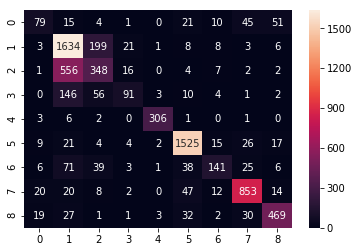

In [323]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True, fmt="d")

In [324]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [325]:
y_pred = xg.predict_proba(x_test)
print("Log-loss",log_loss(y_test,y_pred))
y_pre = xg.predict(x_test)
print(classification_report(y_test,y_pre))

Log-loss 0.6624181187446767
              precision    recall  f1-score   support

           1       0.70      0.25      0.37       226
           2       0.65      0.86      0.74      1883
           3       0.53      0.37      0.43       936
           4       0.77      0.31      0.44       313
           5       0.96      0.97      0.96       319
           6       0.92      0.94      0.93      1623
           7       0.74      0.53      0.62       330
           8       0.86      0.90      0.88       976
           9       0.80      0.82      0.81       584

   micro avg       0.76      0.76      0.76      7190
   macro avg       0.77      0.66      0.69      7190
weighted avg       0.76      0.76      0.75      7190



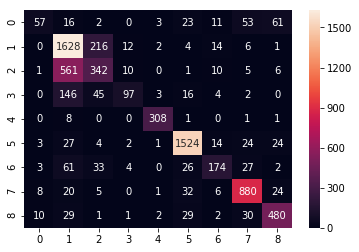

In [326]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True, fmt="d")

In [327]:
xg.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [328]:
test_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,3,1,0,0,0,0,3,10,3,0,1,0,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,2,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,3,2,8,0
1,1,0,2,0,0,0,0,0,1,4,2,0,5,6,0,9,1,0,1,0,2,14,0,4,4,0,0,0,4,0,10,2,2,2,0,0,0,1,0,0,0,4,0,5,0,0,0,4,0,1,0,0,38,10,5,0,1,0,1,0,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,3,1,0,0,0,0,1,0,5,1,0,0,1,4,0
2,0,0,0,0,0,0,0,1,0,5,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,2,2,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,1,0,1,2,3,6,3
3,1,2,1,1,0,0,6,1,1,6,8,0,12,3,0,0,2,0,0,5,2,0,2,36,1,1,1,1,0,1,10,5,0,3,2,1,2,3,0,0,1,0,1,1,0,0,0,12,1,3,0,0,0,2,0,0,1,18,0,1,0,0,0,1,0,1,9,0,1,4,0,0,2,0,1,1,1,6,0,0,0,0,4,0,2,1,1,0,1,1,2,0,0,6,0,1,2,0,7,1
4,0,2,0,0,0,0,0,0,0,7,7,0,2,1,1,1,0,3,0,2,1,1,0,13,0,0,0,0,4,1,10,1,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,2,2,0,2,8,1,1,0,2,0,0,1,2,7,0,1,0,1,0,0,0,3,0,0,1,2,0,0,0,1,0,0,2,1,0,0,7,0,0,1,4,1,1,2,4,9,2


In [126]:
y_pred = model.predict_proba(test_df.values)

In [127]:
def filesub(v,y_pred,test):
    a = pd.DataFrame(y_pred,columns=['proba_1', 'proba_2', 'proba_3', 'proba_4', 'proba_5', 'proba_6', 'proba_7', 'proba_8', 'proba_9'])
    a["unique_id"] = test["unique_id"]
    columns=["unique_id",'proba_1', 'proba_2', 'proba_3', 'proba_4', 'proba_5', 'proba_6', 'proba_7', 'proba_8', 'proba_9']
    a = a[columns]
    a.to_csv(v+"_sub.csv",index=False)

In [128]:
filesub("seventeen",y_pred,t)

In [332]:
train_df.to_csv("train_new.csv")
test_df.to_csv("test_new.csv")

In [334]:
final.to_csv("ptrain.csv")